In [16]:
import os
import pickle as pkl
import ipdb
import yaml
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)

In [64]:
with open("/local/gainondefor/work/data/preds_ind.pkl", 'rb') as f:
    preds_ind_at_1 = pkl.load(f)
with open("/local/gainondefor/work/data/preds_delta.pkl", 'rb') as f:
    preds_delta_at_1 = pkl.load(f)
with open("/local/gainondefor/work/data/labels_ind.pkl", 'rb') as f:
    ind_labels = pkl.load(f)
with open("/local/gainondefor/work/data/labels_delta.pkl", 'rb') as f:
    delta_labels = pkl.load(f)

In [65]:
with open(os.path.join(CFG["gpudatadir"], "delta_dict.pkl"), 'rb') as f_name:
    delta_dict = pkl.load(f_name)
with open(os.path.join(CFG["gpudatadir"], "ind_class_dict.pkl"), 'rb') as f_name:
    industry_dict = pkl.load(f_name)

In [93]:
all_ind_indices = sorted([i for i in industry_dict.keys()])
all_ind_names = sorted([i for i in industry_dict.values()])
all_delta_indices = sorted([i for i in delta_dict.keys()])
all_delta_names = sorted([i for i in delta_dict.values()])

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [70]:
cm_ind = confusion_matrix(ind_labels, preds_ind_at_1, labels=all_ind_indices, sample_weight=None, normalize="all")
cm_delta= confusion_matrix(delta_labels, preds_delta_at_1, normalize="all")

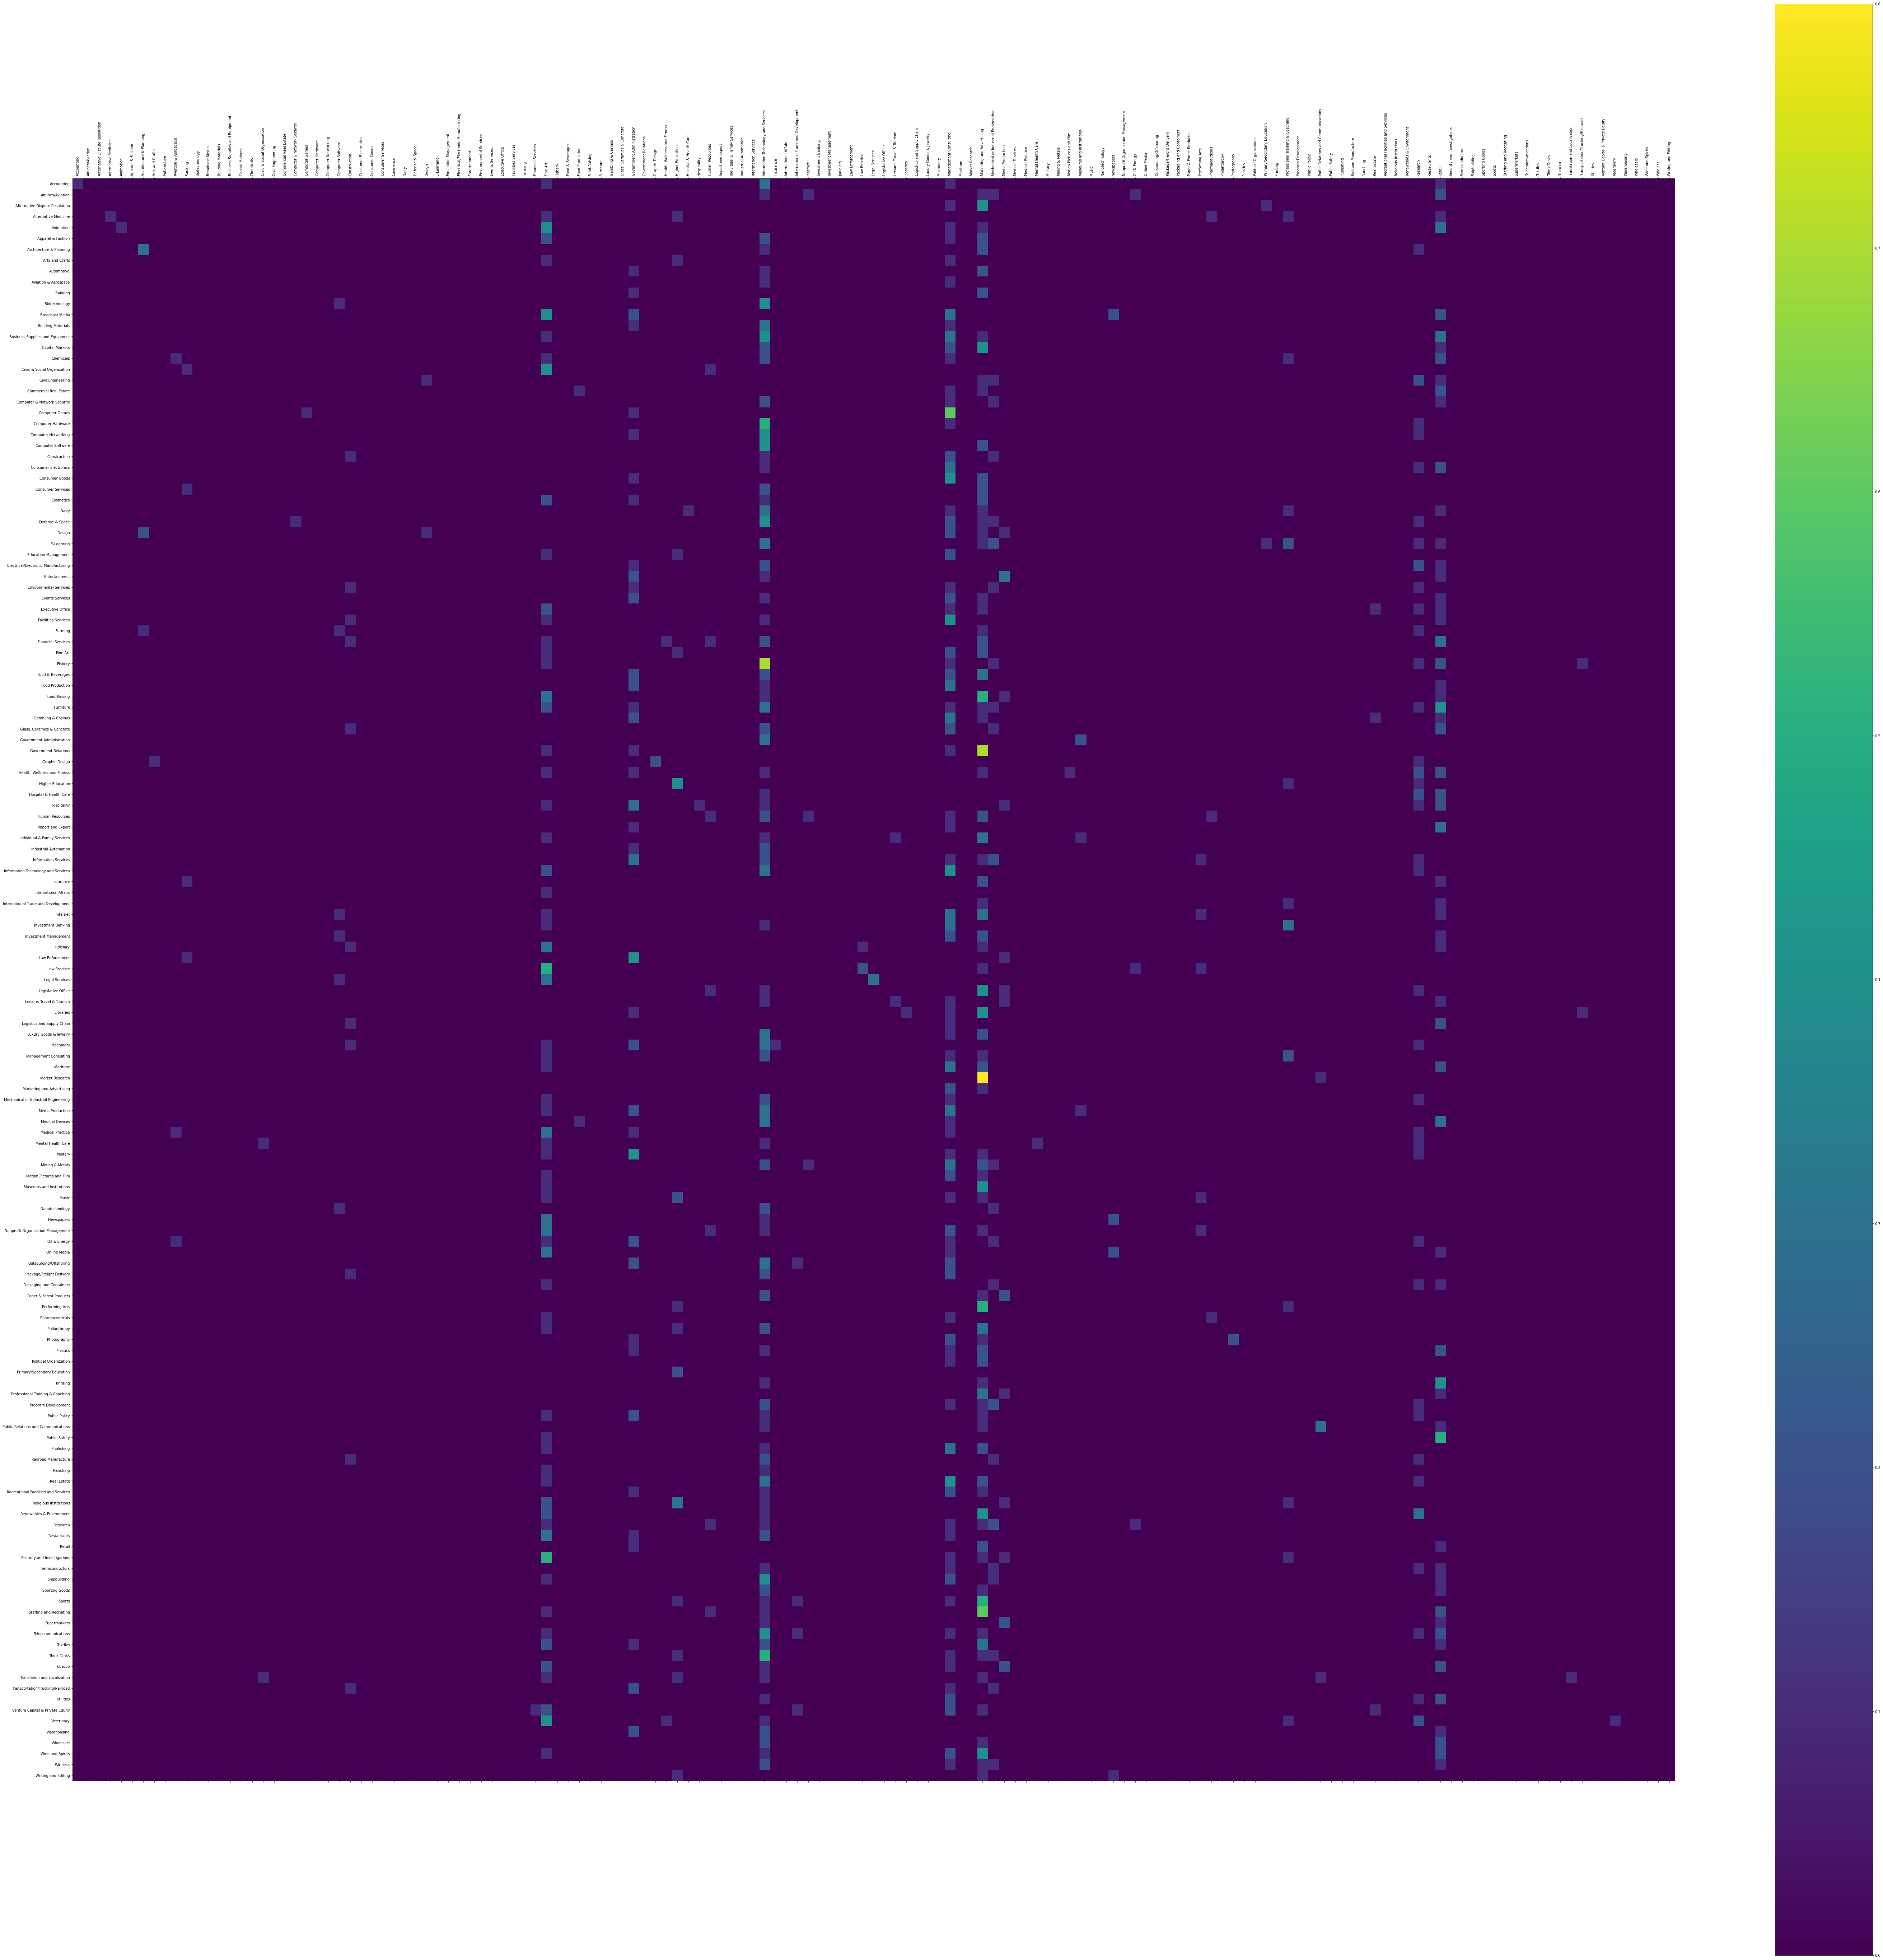

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(100,100))
cax = ax.matshow(cm_ind * 100)
fig.colorbar(cax)
xaxis = np.arange(len(all_ind_names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(all_ind_names, rotation="vertical")
ax.set_yticklabels(all_ind_names)
fig.savefig("/local/gainondefor/work/data/cm_ind.svg")
fig.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

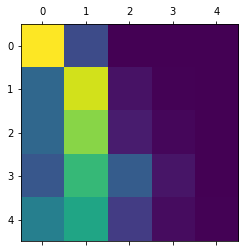

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
cax = ax.matshow(cm_delta)
fig.colorbar(cax)
xaxis = np.arange(len(delta_dict))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(all_ind_names, rotation="vertical")
ax.set_yticklabels(all_ind_names)
fig.show()

In [71]:
cm_delta

array([[0.158, 0.036, 0.   , 0.   , 0.   ],
       [0.053, 0.147, 0.008, 0.001, 0.   ],
       [0.053, 0.13 , 0.012, 0.003, 0.   ],
       [0.043, 0.106, 0.046, 0.009, 0.   ],
       [0.068, 0.093, 0.028, 0.005, 0.001]])